<h4>
    
`ID`: уникальный идентификатор записи.

`Customer_ID`: уникальный идентификатор клиента.

`Month`: Месяц года

`Name`: Имя человека

`Age`: Возраст человека

`SSN`: номер социального страхования человека.

`Occupation`: Род занятий человека

`Annual_Income`: годовой доход человека.

`Monthly_Inhand_Salary`: Ежемесячная наличная зарплата человека.

`Num_Bank_Accounts`: количество банковских счетов человека.

`Num_Credit_Card`: количество кредитных карт, которые имеет человек.

`Interest_Rate`: процентная ставка по кредитной карте человека.

`Num_of_Loan`: количество кредитов, взятых человеком в банке.

`Type_of_Loan`: Типы кредитов, взятых человеком в банке.

`Delay_from_due_date`: Среднее количество дней, просроченных человеком с даты платежа.

`Num_of_Delayed_Payment`: количество платежей, задержанных данным лицом.

`Changed_Credit_Card`: процентное изменение лимита кредитной карты человека.

`Num_Credit_Inquiries`: количество запросов по кредитной карте от человека.

`Credit_Mix`: Классификация кредитного микса клиента.

`Outstanding_Debt`: непогашенный остаток лица.

`Credit_Utilization_Ratio`: коэффициент использования кредита кредитной карты клиента.

`Credit_History_Age`: возраст кредитной истории человека.

`Payment_of_Min_Amount`: Да, если человек заплатил только минимальную сумму, подлежащую выплате, в противном случае — нет.

`Total_EMI_per_month`: общая EMI человека за месяц.

`Amount_invested_monthly`: ежемесячная сумма, вложенная человеком.

`Payment_Behaviour`: платежное поведение человека.

`Monthly_Balance`: ежемесячный баланс, оставшийся на счету человека.

`Credit_Score`: кредитный рейтинг человека.
</h4>

In [549]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
%matplotlib inline

In [446]:
test_data = pd.read_csv('credit_test.csv', encoding='utf-8', na_values=['_', '_______', '#F%$D@*&8', '!@9#%8','nan'])
train_data = pd.read_csv('credit_train.csv', encoding='utf-8', na_values=['_', '_______', '#F%$D@*&8', '!@9#%8','nan'])

C:\Users\alexs\AppData\Local\Temp\ipykernel_1584\4216716930.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('credit_train.csv', encoding='utf-8', na_values=['_', '_______', '#F%$D@*&8', '!@9#%8','nan'])


<font color="red"><h2>Препроцессинг train_data</h2></font>

In [447]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [448]:
train_data['Month'] = pd.to_datetime(train_data.Month, format="%B").dt.month
#Переходим к формату времени в столбце Month

In [449]:
has_duplicates = train_data.duplicated().any()
#Проверка на дубликаты

In [450]:
train_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [451]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [452]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                         int32
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [453]:
#Заносим фичи в список, которые надо преобразовать в другой тип данных
edit_clmns_to_int = ['Age', 'Num_of_Loan']
edit_clmns_to_float = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

In [454]:
#Меняем в int
for int_col in edit_clmns_to_int:
    train_data[int_col] = train_data[int_col].str.extract('(\d+)').astype(int)

In [455]:
#Меняем в float
for float_col in edit_clmns_to_float:
    train_data[float_col] = train_data[float_col].str.extract(r'(\d+\.\d+)').astype(float)

In [456]:
#Исключение, меняем в float
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

<h4>Заполняем пустые ячейки</h4>

In [457]:
#Ячейки, которые заполним средним значением данной ячейки
pool_col = ['Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_of_Delayed_Payment']

In [458]:
for item in pool_col:
    train_data[item] = train_data[item].fillna(train_data[item].mean())

In [459]:
train_data.isna().sum().sum()

82513

<h4>Исследуем Фичи</h4>

In [460]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

In [461]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                         int32
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [462]:
#Удаляем не нужные фичи
train_data = train_data.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)

In [463]:
#Заыбл заполнить фичи средним значением, заполняем
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].fillna(train_data['Monthly_Balance'].mean())
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].fillna(train_data['Amount_invested_monthly'].mean())

In [464]:
#Заполняю пустые значения методом ffill
train_data['Occupation'].ffill(inplace=True)
train_data['Credit_Mix'].ffill(inplace=True)
train_data['Credit_History_Age'].ffill(inplace=True)
train_data['Payment_Behaviour'].ffill(inplace=True)

In [465]:
#Проверяем
train_data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  1
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [466]:
train_data.dtypes

Month                         int32
Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [467]:
#Преобразуем текстовые значения Credit_Score в int
train_data['Credit_Score'] = train_data['Credit_Score'].replace({'Good': 2, 'Poor': 0, 'Standard': 1})
train_data['Occupation'] = train_data['Occupation'].replace({'Scientist': 0, 'Teacher': 1, 'Engineer': 2, 'Entrepreneur': 3, 'Developer': 4,
       'Lawyer': 5, 'Media_Manager': 6, 'Doctor': 7, 'Journalist': 8, 'Manager': 9,
       'Accountant': 10, 'Musician': 11, 'Mechanic': 12, 'Writer': 13, 'Architect': 14})
train_data['Credit_Mix'] = train_data['Credit_Mix'].replace({'Good': 2, 'Bad': 0, 'Standard': 1})
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].replace({'High_spent_Small_value_payments': 0,
       'Low_spent_Large_value_payments': 1, 'Low_spent_Medium_value_payments': 2, 'Low_spent_Small_value_payments': 3,
       'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5})
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 2, 'Yes': 1})

In [468]:
#Преобразуем Credit_History_Age в float значения 
matches1 = train_data['Credit_History_Age'].str.extract('(\d+)').rename(columns={0: 'ye'})
matches2 = train_data['Credit_History_Age'].str.extract('and (\d+)').rename(columns={0: 'mo'})
total = pd.concat([matches1, matches2], axis=1).astype(float)
total['total'] = total['ye'] + (total['mo']/10)
total = total.drop(['ye', 'mo'], axis=1)
train_data['Credit_History_Age'] = total['total']

In [469]:
y_train_data = train_data['Credit_Score']
X_train_data = train_data.drop(['Credit_Score'], axis=1)

<font color="red"><h2>Препроцессинг test_data</h2></font>

<h3>Для начала посмотрим на вводные нашего фрейма</h3>

In [470]:
test_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,NaN,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [471]:
test_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [472]:
test_data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                         2828
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour           3800
Monthly_Balance              562
dtype: int64

In [473]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       47172 non-null  object 
 6   Occupation                46562 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [474]:
#Удаляем не нужные фичи
test_data = test_data.drop(['ID', 'Customer_ID', 'Name', 'Type_of_Loan', 'SSN'], axis=1)

In [475]:
#Преобразуем месяцы datetime
test_data['Month'] = pd.to_datetime(test_data.Month, format="%B").dt.month

In [476]:
#Заносим фичи в список, которые надо преобразовать в другой тип данных
edit_clmns_to_int = ['Age', 'Num_of_Loan']
edit_clmns_to_float = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

In [477]:
#Меняем в int
for int_col in edit_clmns_to_int:
    test_data[int_col] = test_data[int_col].str.extract('(\d+)').astype(int)

In [478]:
#Меняем в float
for float_col in edit_clmns_to_float:
    test_data[float_col] = test_data[float_col].str.extract(r'(\d+\.\d+)').astype(float)

In [479]:
#Исключение, меняем в float
test_data['Num_of_Delayed_Payment'] = test_data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

In [480]:
#Ячейки, которые заполним средним значением данной ячейки
pool_col = ['Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_of_Delayed_Payment']

for item in pool_col:
    test_data[item] = test_data[item].fillna(test_data[item].mean())

test_data['Monthly_Balance'] = test_data['Monthly_Balance'].fillna(test_data['Monthly_Balance'].mean())
test_data['Amount_invested_monthly'] = test_data['Amount_invested_monthly'].fillna(test_data['Amount_invested_monthly'].mean())

In [481]:
test_data['Occupation'].ffill(inplace=True)
test_data['Credit_Mix'].ffill(inplace=True)
test_data['Credit_History_Age'].ffill(inplace=True)
test_data['Payment_Behaviour'].ffill(inplace=True)

In [482]:
#Преобразуем текстовые значения в int
test_data['Occupation'] = test_data['Occupation'].replace({'Scientist': 0, 'Teacher': 1, 'Engineer': 2, 'Entrepreneur': 3, 'Developer': 4,
       'Lawyer': 5, 'Media_Manager': 6, 'Doctor': 7, 'Journalist': 8, 'Manager': 9,
       'Accountant': 10, 'Musician': 11, 'Mechanic': 12, 'Writer': 13, 'Architect': 14})
test_data['Credit_Mix'] = test_data['Credit_Mix'].replace({'Good': 2, 'Bad': 0, 'Standard': 1})
test_data['Payment_Behaviour'] = test_data['Payment_Behaviour'].replace({'High_spent_Small_value_payments': 0,
       'Low_spent_Large_value_payments': 1, 'Low_spent_Medium_value_payments': 2, 'Low_spent_Small_value_payments': 3,
       'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5})
test_data['Payment_of_Min_Amount'] = test_data['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 2, 'Yes': 1})

In [483]:
#Преобразуем Credit_History_Age в float значения 
matches1 = test_data['Credit_History_Age'].str.extract('(\d+)').rename(columns={0: 'ye'})
matches2 = test_data['Credit_History_Age'].str.extract('and (\d+)').rename(columns={0: 'mo'})
total = pd.concat([matches1, matches2], axis=1).astype(float)
total['total'] = total['ye'] + (total['mo']/10)
total = total.drop(['ye', 'mo'], axis=1)
test_data['Credit_History_Age'] = total['total']

In [484]:
X_test_data = test_data

<font color="red"><h2>Несколько графиков</h2></font>

In [260]:
name_occupation = list(train_data['Occupation'].unique())
num_occupation = train_data['Occupation'].value_counts() 

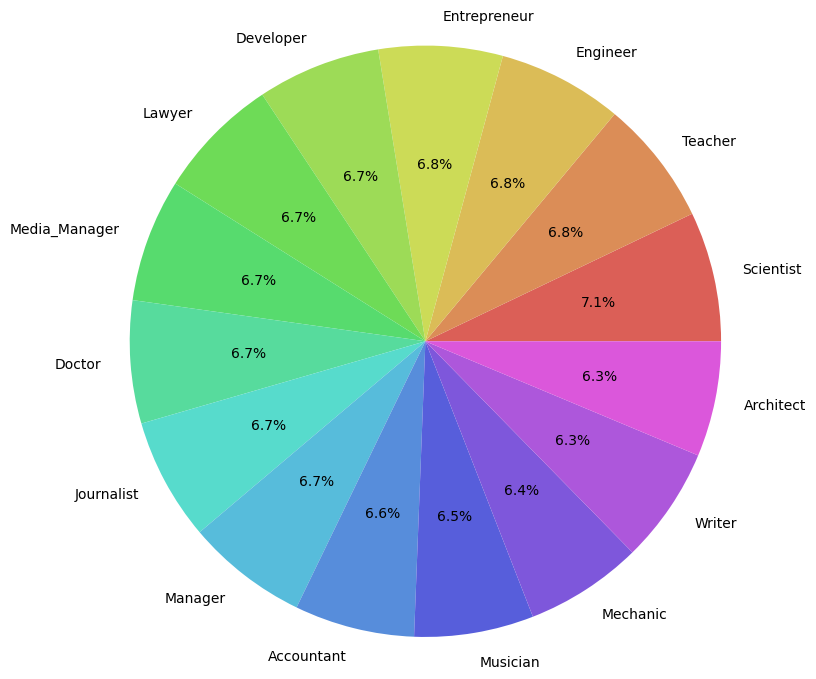

In [261]:
plt.pie(x=num_occupation, labels=name_occupation, colors=sns.color_palette('hls', 17), radius=2, autopct= '%1.1f%%')
plt.show()

<h5>График рода занятости</h5>

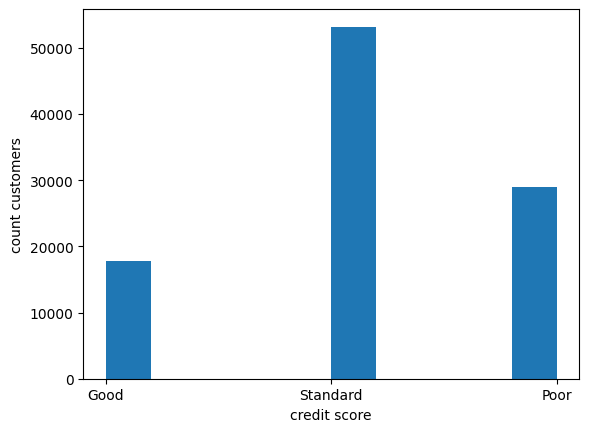

In [167]:
plt.hist(train_data['Credit_Score'])
plt.ylabel('count customers')
plt.xlabel('credit score')
plt.show()

<font color="red"><h2>Обучаем</h2></font>

<h3>RandomForestClassifier</h3>

In [511]:
X_train_data = X_train_data.fillna(0.0)

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

In [515]:
clf_rf = RandomForestClassifier()

In [516]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [518]:
predictions = clf_rf.predict(X_test)

In [521]:
accuracy_rfc = accuracy_score(y_test, predictions)

In [522]:
accuracy_rfc

0.8024

In [535]:
#Итоговый датафрейм предсказания
predictions_end = clf_rf.predict(X_test_data)
frame = pd.Series(predictions_end)
frame = frame.replace({0: 'Poor', 1: 'Standard', 2: 'Good'})

<h3>HistGradientBoostingClassifier</h3>

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

In [537]:
hgbc = HistGradientBoostingClassifier()

In [539]:
hgbc.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [542]:
predict_hgbc = hgbc.predict(X_test)

In [543]:
accuracy_hgbc = accuracy_score(y_test, predict_hgbc)

In [544]:
accuracy_hgbc

0.73865

In [547]:
predict_hgbc = hgbc.predict(X_test_data)
frame_hgbc = pd.Series(predict_hgbc)
frame_hgbc = frame_hgbc.replace({0: 'Poor', 1: 'Standard', 2: 'Good'})

<h3>XGBClassifier</h3>

In [551]:
xgbc = XGBClassifier()

In [552]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [554]:
predictions_xgbc = xgbc.predict(X_test)

In [556]:
accuracy_xgbc = accuracy_score(y_test, predictions_xgbc)

In [558]:
accuracy_xgbc

0.75975

In [559]:
accuracy_xgbc = hgbc.predict(X_test_data)
frame_xgbc = pd.Series(predict_hgbc)
frame_xgbc = frame_xgbc.replace({0: 'Poor', 1: 'Standard', 2: 'Good'})